 ##  Step 1: Import Required Libraries
In this step, we load all the necessary Python libraries used for analysis and visualization:

- `pandas` → data loading & manipulation  
- `matplotlib` and `seaborn` → statistical visualizations  
- `numpy` → numerical computations  
- `plotly.express` → interactive visualizations  
- `os` → folder handling for saving outputs

We also set a clean theme for charts using `sns.set(style="whitegrid")`.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
import plotly.express as px
import os

sns.set(style="whitegrid")


## Step 2: Load the Dataset
Here, we load the `ds_salaries.csv` dataset:

- Shows first few rows of the dataset

In [63]:
df = pd.read_csv('../data/raw/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [64]:
# Check structure and missing values
print(df.info())
print(df.isnull().sum())

# Check salary range + outliers
print(df['salary_in_usd'].describe())

# Unique values check
print(df['salary_currency'].unique())
print(df['job_title'].value_counts().head(10))
print(df['remote_ratio'].value_counts())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0

## 📌 Step 3:Display Basic Information
- Displays dataset shape (rows × columns)
- Provides column information and data types
- Summary of numerical statistics
- Count of missing values per column

This helps in understanding the dataset structure and quality before further analysis.


In [65]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())




Shape of dataset: (607, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None

Statistical Summary:
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.0000

In [66]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


## 📌 Step 4: Explore Unique Values in Categorical Columns
We explore important categorical columns to understand dataset diversity:

- Number of unique job titles
- List of job titles
- Unique company locations
- Unique experience levels
- Unique employment types

This gives insight into dataset richness and variety in roles, locations and experience levels.


In [67]:
print("Unique Job Titles:", len(df['job_title'].unique()))
print(df['job_title'].unique()[:10])  # first 10 job titles

print("\nUnique Company Locations:", df['company_location'].unique())

print("\nUnique Experience Levels:", df['experience_level'].unique())

print("\nUnique Employment Types:", df['employment_type'].unique())


Unique Job Titles: 50
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst']

Unique Company Locations: ['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE']

Unique Experience Levels: ['MI' 'SE' 'EN' 'EX']

Unique Employment Types: ['FT' 'CT' 'PT' 'FL']


### 🔹 Step 5: Data Cleaning — Removing Duplicates and Null Records
To enhance dataset quality, we apply the following cleaning actions:

- Count and remove duplicate records
- Remove missing values (if any)
- Save the cleaned dataset into the `data/processed` directory

Ensuring clean data helps avoid biased or misleading results during visualizations and analysis.


In [68]:
print("Rows before removing duplicates:", len(df))
df = df.drop_duplicates()
print("Rows after removing duplicates:", len(df))

print("\nChecking missing values again:")
df = df.dropna()
print(df.isnull().sum())


Rows before removing duplicates: 607
Rows after removing duplicates: 607

Checking missing values again:
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [69]:
import os

os.makedirs("data/processed", exist_ok=True)

df.to_csv("data/processed/salary_cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


### 🔹 Step 6: Feature Engineering — Adding Analytical Variables
To improve analytical depth, we convert business-meaningful categorical fields into numeric representations:

- `experience_level` → numerical scale (EN=1, MI=2, SE=3, EX=4)
- `remote_ratio` → binary remote flag (1 = remote/hybrid, 0 = on-site)
- `employment_type` → numeric mapping (FT, PT, CT, FL)

These engineered variables enable easier statistical comparison and correlation analysis.


In [70]:
# Map experience levels to numeric
exp_map = {'EN':1, 'MI':2, 'SE':3, 'EX':4}
df['experience_num'] = df['experience_level'].map(exp_map)


df['remote_flag'] = df['remote_ratio'].apply(lambda x: 1 if x>0 else 0)


emp_map = {'FT':1, 'PT':2, 'CT':3, 'FL':4}  
if 'employment_type' in df.columns:
    df['employment_num'] = df['employment_type'].map(emp_map)


### 🔹 Step 7: Visualizing Salary Distribution
A histogram along with a KDE (Kernel Density Estimate) curve is plotted to observe the salary spread.



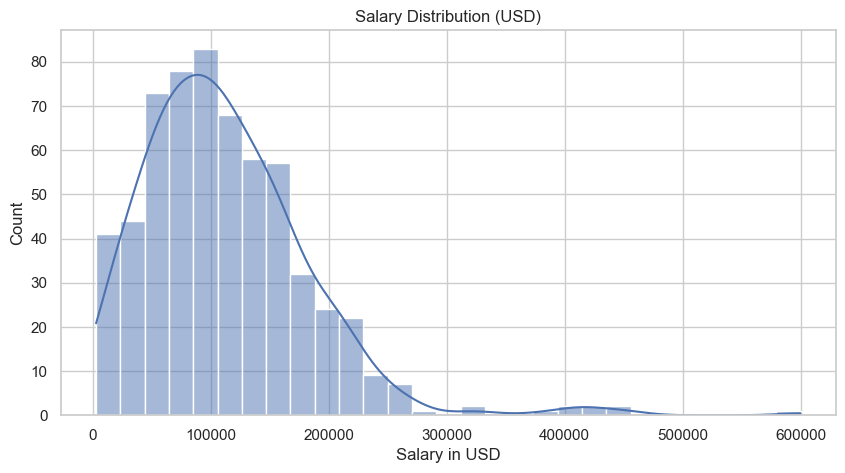

In [71]:
plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.show()


### 🔹 Step 8: Relationship Between Experience Level and Salary
A boxplot is used to compare salary variations across different experience levels.

This visualization highlights how compensation evolves as experience increases and whether salary growth is linear, gradual, or steep across roles.


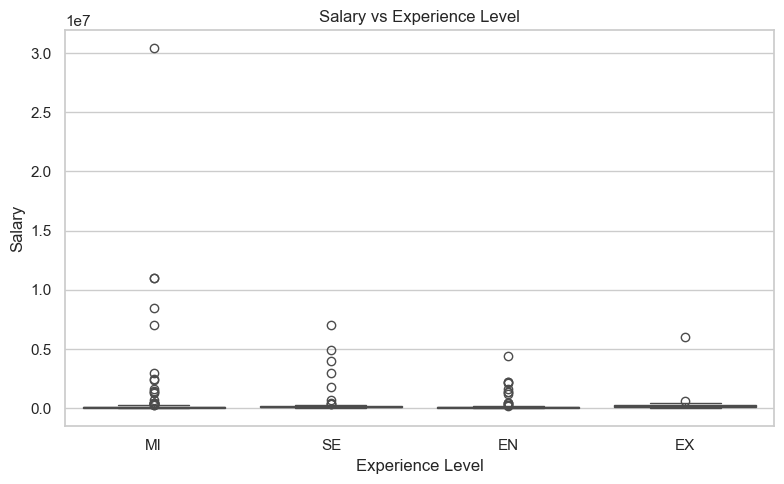

Plot saved successfully!


In [72]:

import os
os.makedirs("outputs", exist_ok=True)

plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level', y='salary', data=df)
plt.title("Salary vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.tight_layout()

plt.savefig("outputs/salary_vs_experience.png")
plt.show()

print("Plot saved successfully!")



### 🔹 Step 9: Top 10 Highest Paying Job Roles
Here, the average salary for each job title is computed and the top 10 highest-paying roles are visualized.

This analysis identifies the most lucrative roles in the data-science industry and offers valuable insight into high-value career opportunities.


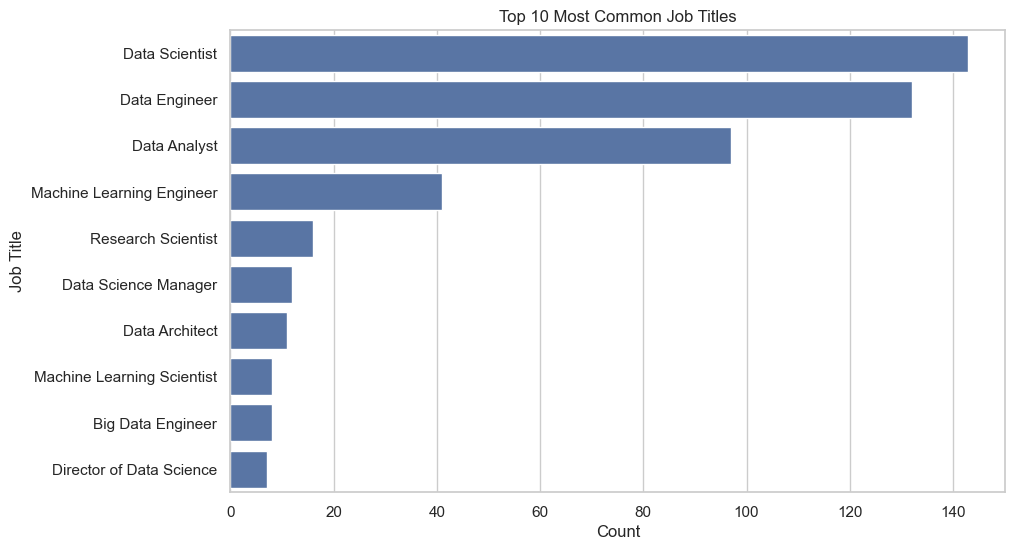

In [73]:
top_jobs = df['job_title'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()


### 🔹 Step 10: Top 10 Highest Paying Locations
The dataset is analyzed to compute average salaries across countries.  
We then visualize the top 10 highest-paying locations globally.

This comparison reveals how geography influences compensation and highlights regions where data professionals are paid the most.


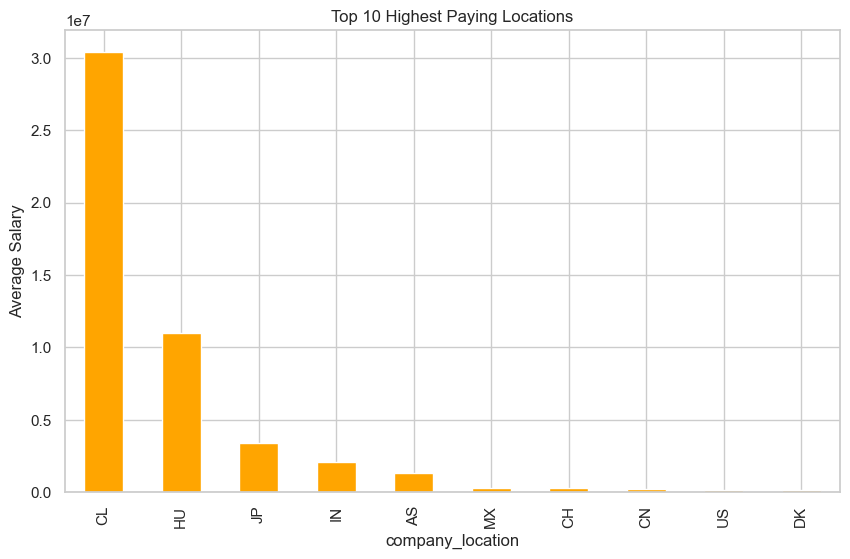

In [74]:
plt.figure(figsize=(10,6))
top_locations = df.groupby('company_location')['salary'].mean().sort_values(ascending=False)[:10]
top_locations.plot(kind='bar', color='orange')
plt.title("Top 10 Highest Paying Locations")
plt.ylabel("Average Salary")
plt.savefig("outputs/top_locations.png")
plt.show()


### 🔹 Step 11: Comparing Salary Across Employment Types
A boxplot is used to explore how salary varies according to employment type (e.g., full-time, contract, part-time, freelance).

This helps determine whether full-time workers dominate the high-salary bracket or whether contract/freelance roles offer competitive compensation.


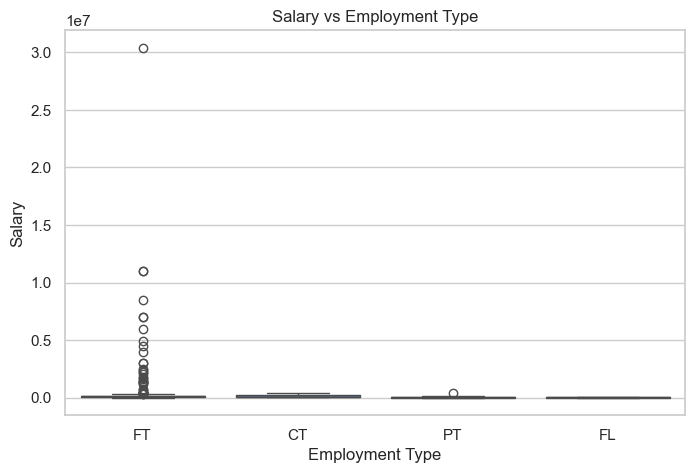

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(x='employment_type', y='salary', data=df)
plt.title("Salary vs Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Salary")
plt.savefig("outputs/salary_vs_employment.png")
plt.show()


### 🔹 Step 12: Impact of Remote Work on Salary
A scatterplot is generated to examine the relationship between remote work and salary.

By grouping data based on experience level, we analyze whether:
- Remote employees earn more or less on average
- Certain experience levels benefit more from remote working environments


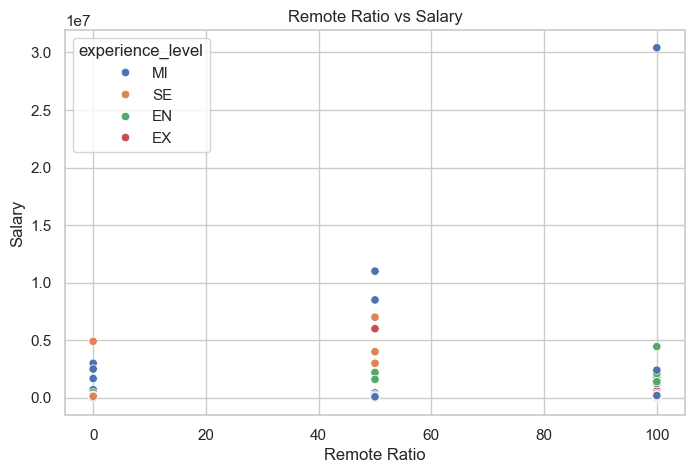

In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='remote_ratio', y='salary', data=df, hue='experience_level')
plt.title("Remote Ratio vs Salary")
plt.xlabel("Remote Ratio")
plt.ylabel("Salary")
plt.savefig("outputs/remote_salary_scatter.png")
plt.show()


### 🔹 Step 13: Correlation Analysis of Numerical Features
A correlation heatmap is visualized to evaluate relationships among numerical variables:

- Salary
- Experience numeric mapping
- Remote ratio
- Employment numeric mapping

This step helps identify factors that may strongly influence salary levels.


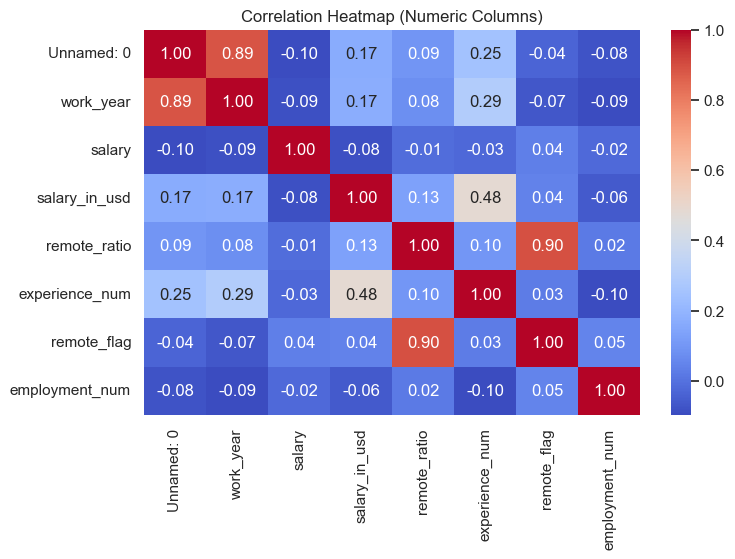

In [77]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.savefig("outputs/correlation_heatmap.png")
plt.show()


### 🔹 Step 14: Salary Analysis by Experience Level & Employment Type
An interactive boxplot is generated to compare salary distribution across different experience levels while accounting for employment type. This visualization helps identify:

- Whether salary increases consistently from entry-level to expert roles.
- How employment types (FT, PT, CT, FL) affect salary within each experience group.

This step provides a clearer picture of how professional experience and employment conditions together influence compensation in the data science field.


### 🔹 Step 15: Remote Work Ratio vs Salary Relationship
An interactive scatter plot is generated to examine how the percentage of remote work relates to salary levels across different experience categories. The visualization highlights:

- Whether higher remote flexibility is associated with higher or lower salaries.
- How experience level influences salary trends in remote and on-site roles.
- Additional insights through hover data, showing job title, company location, and employment type.

This step helps understand how remote work culture impacts compensation in the data science industry.


In [78]:
fig = px.scatter(df, x='remote_ratio', y='salary', color='experience_level',
                 hover_data=['job_title','company_location','employment_type'],
                 title="Remote Ratio vs Salary by Experience Level")
fig.show()
plt.savefig("outputs/px_Remote Ratio vs Salary by Experience Level.png")    


<Figure size 640x480 with 0 Axes>

### 🔹Step 16: Salary Distribution by Experience Level & Employment Type (Violin Plot)
A violin plot is generated to visualize how salary is distributed across different experience levels while also separating employees by employment type. This plot helps in identifying:

- The spread and density of salaries within each experience category.
- How employment type (FT, PT, CT, FL) influences salary distributions inside each level.
- Presence of skewness or outliers among different experience groups.

This visualization provides a deeper understanding of how compensation varies not only by seniority but also by the nature of employment.


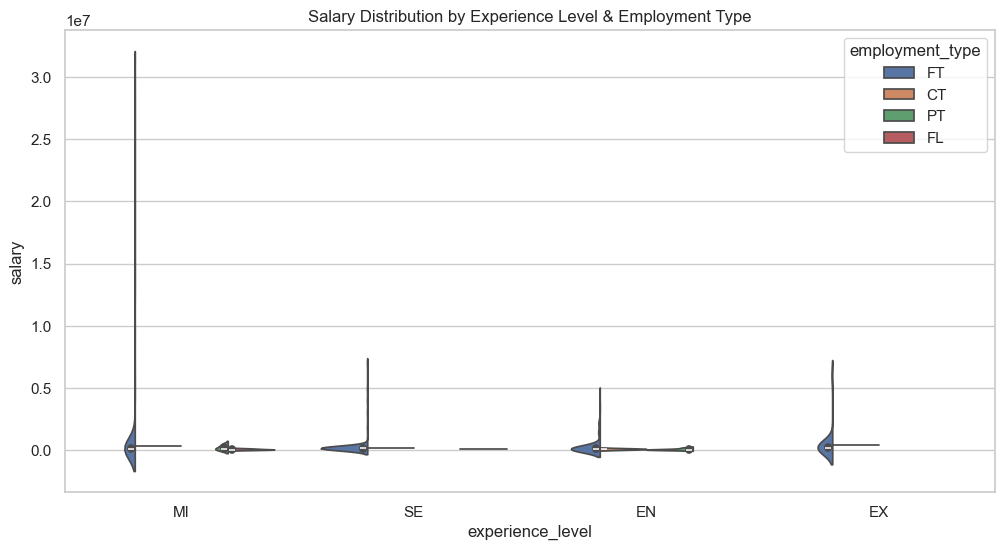

<Figure size 640x480 with 0 Axes>

In [79]:
plt.figure(figsize=(12,6))
sns.violinplot(x='experience_level', y='salary', hue='employment_type', data=df, split=True)
plt.title("Salary Distribution by Experience Level & Employment Type")
plt.show()
plt.savefig("outputs/salary_distribution_experience_employment.png")

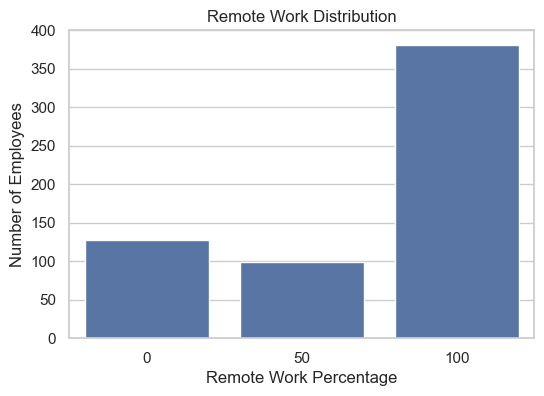

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['remote_ratio'])
plt.title("Remote Work Distribution")
plt.xlabel("Remote Work Percentage")
plt.ylabel("Number of Employees")
plt.savefig("outputs/remote_work_distribution.png")
plt.show()


### 🔹 Step 17: Multivariate Analysis Using Pairplot
A pairplot visualizes pair-wise relationships between numeric variables to identify:

- Linear and non-linear trends
- Variable interactions
- Presence of clusters or outliers

This step completes the full statistical exploration of the dataset.


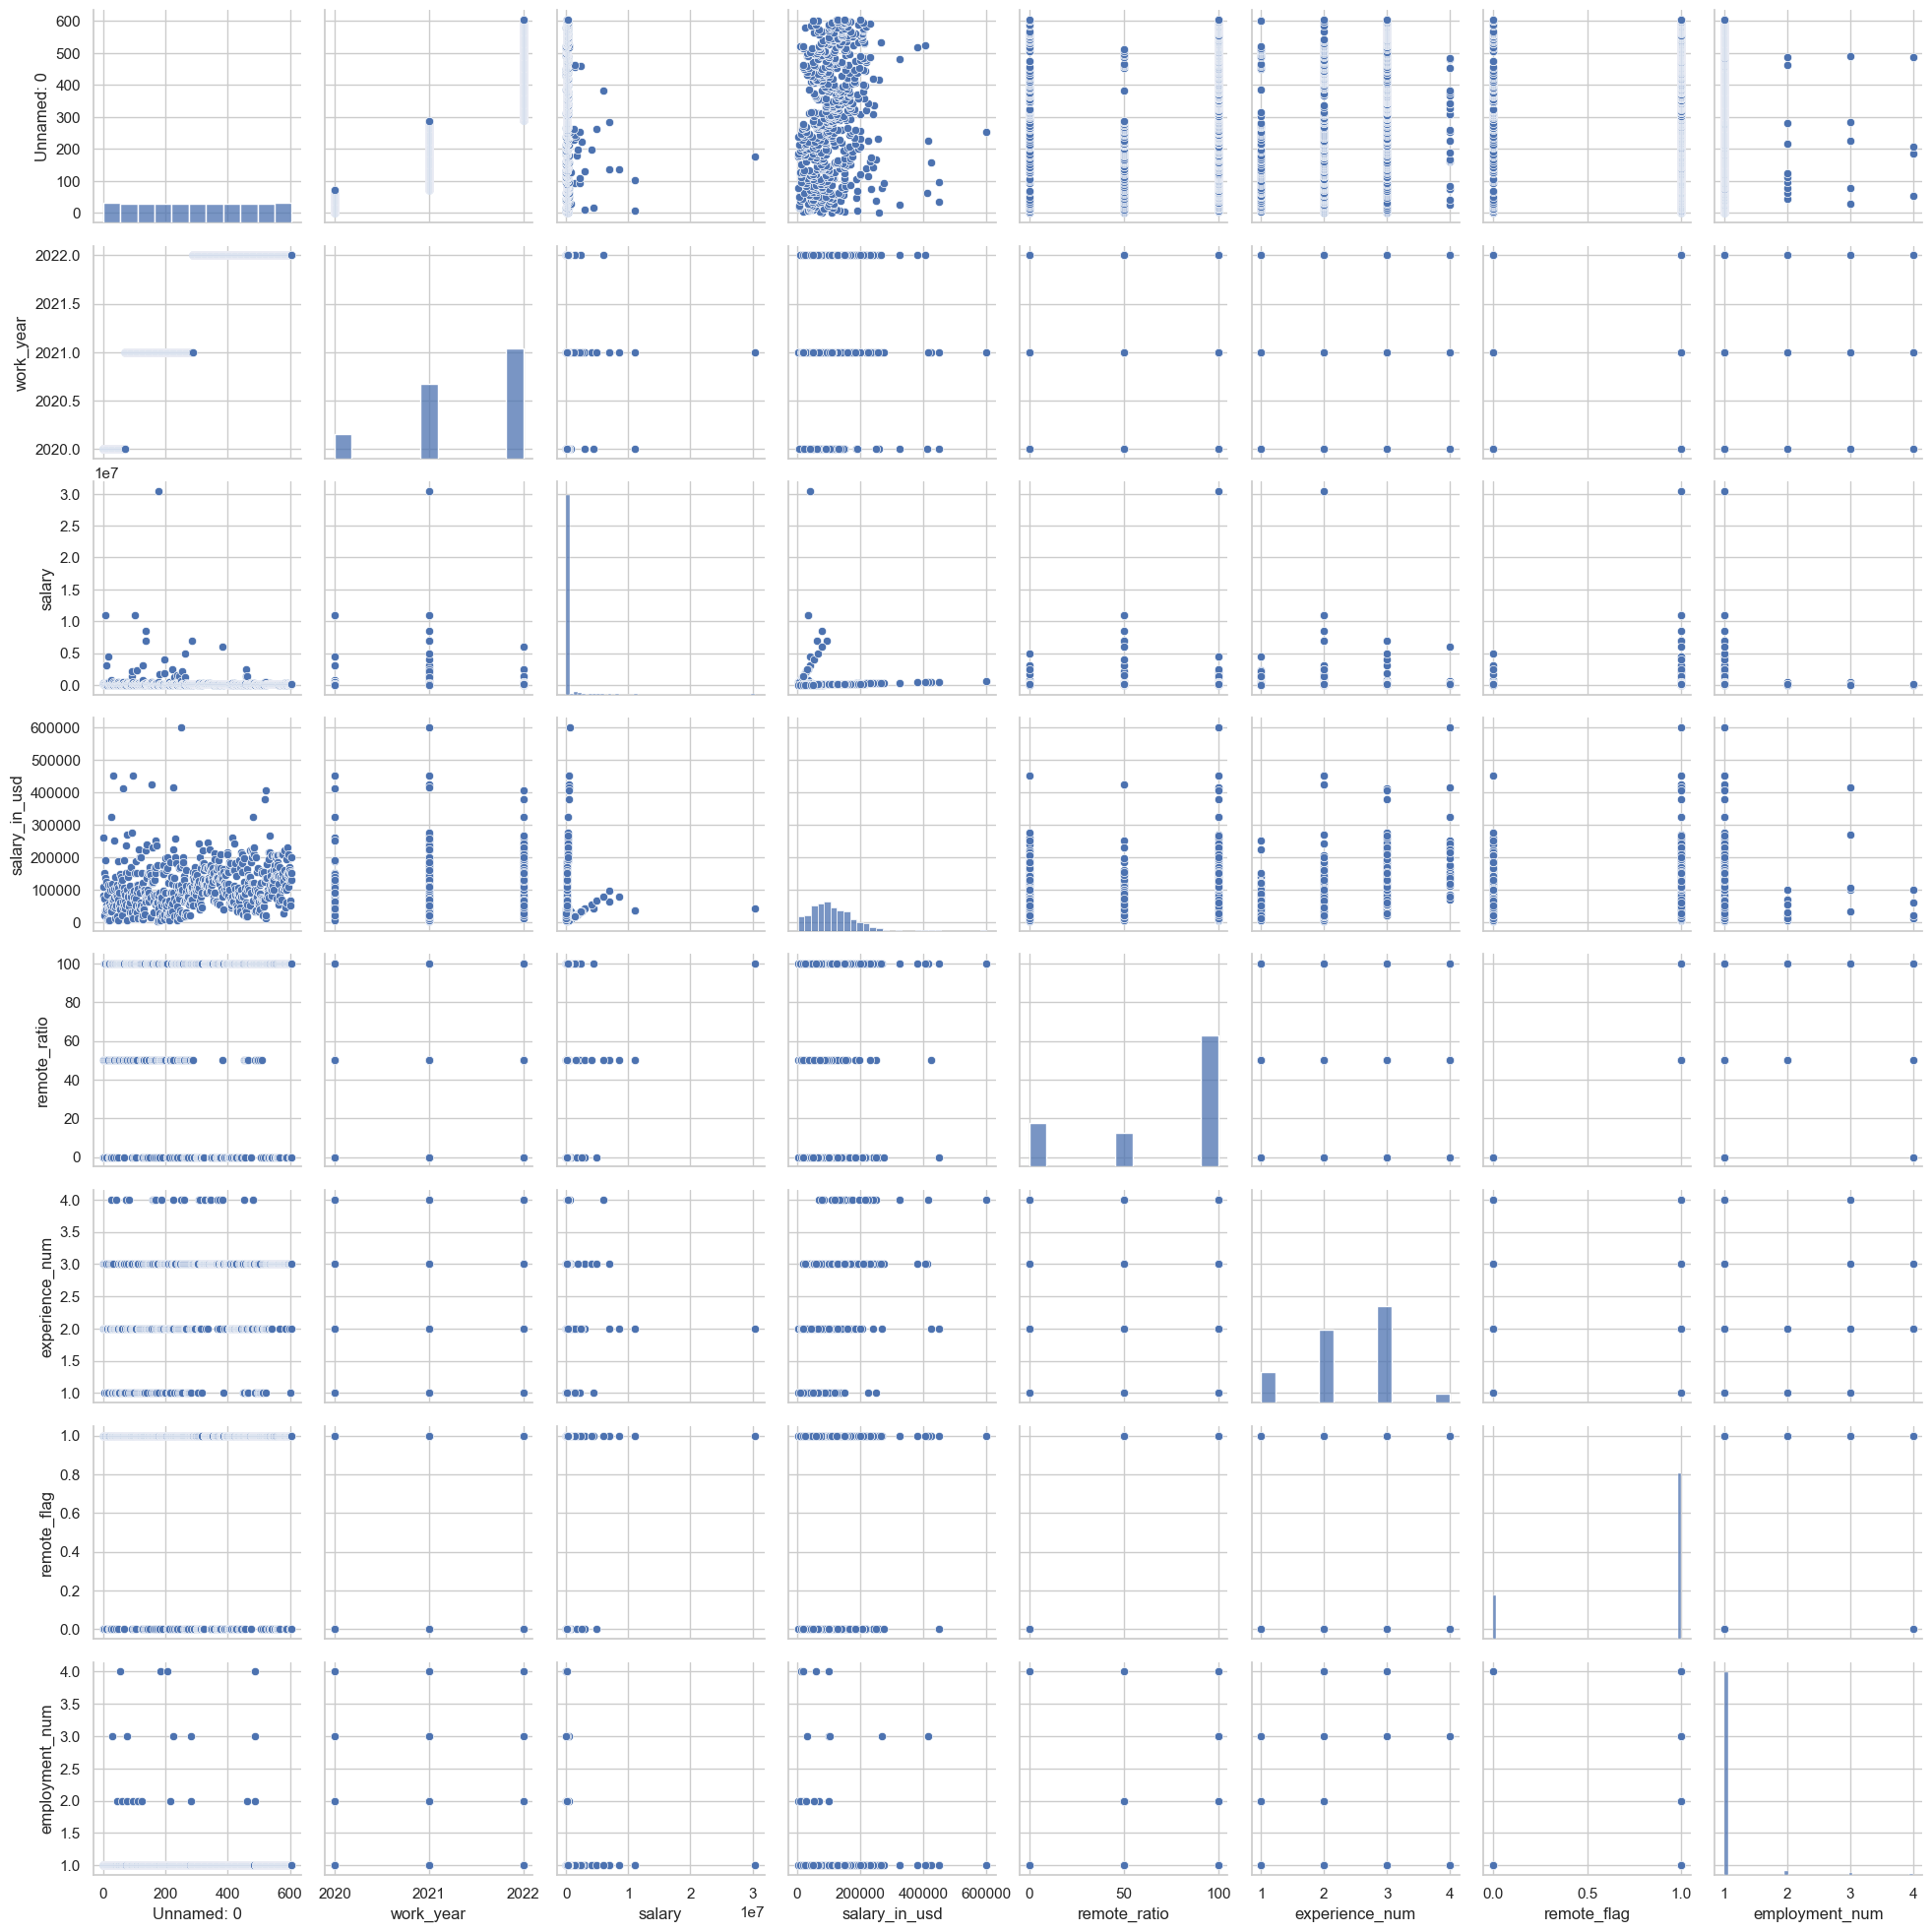

<Figure size 640x480 with 0 Axes>

In [81]:
sns.pairplot(numeric_df)
plt.show()
plt.savefig("outputs/pairplot_numeric.png")
